In [4]:
# A/B Testing Simulation and Conversion Prediction

"""Objective**: Simulate user behavior across two variants (A and B), evaluate statistical significance using bootstrapping, and apply machine learning to predict user conversion behavior.

**Tools Used**: Python, Pandas, NumPy, Seaborn, Scikit-learn, Matplotlib

**Concepts**: Bootstrapping, Confidence Intervals, Logistic Regression, EDA """



'Objective**: Simulate user behavior across two variants (A and B), evaluate statistical significance using bootstrapping, and apply machine learning to predict user conversion behavior.\n\n**Tools Used**: Python, Pandas, NumPy, Seaborn, Scikit-learn, Matplotlib\n\n**Concepts**: Bootstrapping, Confidence Intervals, Logistic Regression, EDA '

In [43]:
import pandas as pd
import numpy as np

# I wanted to simulate user interaction with two different webpage versions
np.random.seed(42)  # Set seed to make results reproducible
n = 100000  # Tried with 2000 first, increasing to 100k for more realistic results

# I considered 4 features: variant (A/B), age, time spent, and device type
variant_choices = ['A', 'B']
device_choices = ['Desktop', 'Mobile']

# Create base dataframe
df = pd.DataFrame()
df['variant'] = np.random.choice(variant_choices, size=n)
df['age'] = np.random.randint(18, 60, size=n)
df['time_on_site'] = np.round(np.random.normal(loc=100, scale=20, size=n), 2)  # Rounded to 2 decimals
df['device'] = np.random.choice(device_choices, size=n)

# Assign conversions: Version B has slightly higher conversion rate than A
def assign_conversion(row):
    if row['variant'] == 'B':
        return 1 if np.random.rand() < 0.13 else 0
    else:
        return 1 if np.random.rand() < 0.10 else 0

df['converted'] = df.apply(assign_conversion, axis=1)

# Check if dataset looks okay
print("Preview of dataset:")
print(df.head())

print("\nConversion rates:")
print(df.groupby('variant')['converted'].mean())

# Save for reuse
df.to_csv("ab_simulated_data.csv", index=False)

print("\n-> Conversion Rate by Variant:")
variant_table = df.groupby('variant')['converted'].agg(['mean', 'count', 'sum']).rename(columns={
    'mean': 'Conversion Rate',
    'count': 'Total Users',
    'sum': 'Total Conversions'
})
print(variant_table)
print("\n-> Conversion Rate by Device:")
device_table = df.groupby('device')['converted'].agg(['mean', 'count', 'sum']).rename(columns={
    'mean': 'Conversion Rate',
    'count': 'Total Users',
    'sum': 'Total Conversions'
})
print(device_table)
print("\n-> Conversion Rate by Variant and Device:")
combo_table = df.groupby(['variant', 'device'])['converted'].agg(['mean', 'count', 'sum']).rename(columns={
    'mean': 'Conversion Rate',
    'count': 'Total Users',
    'sum': 'Total Conversions'
})
print(combo_table)

Preview of dataset:
  variant  age  time_on_site   device  converted
0       A   26         93.82  Desktop          0
1       B   53        106.47   Mobile          0
2       A   23        120.37  Desktop          0
3       A   41        109.60   Mobile          0
4       A   43         94.18   Mobile          0

Conversion rates:
variant
A    0.100467
B    0.130735
Name: converted, dtype: float64

-> Conversion Rate by Variant:
         Conversion Rate  Total Users  Total Conversions
variant                                                 
A               0.100467        49937               5017
B               0.130735        50063               6545

-> Conversion Rate by Device:
         Conversion Rate  Total Users  Total Conversions
device                                                  
Desktop         0.115507        50196               5798
Mobile          0.115734        49804               5764

-> Conversion Rate by Variant and Device:
                 Conversion Rate  Tot

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
df.info()
df.describe()
df['converted'].value_counts()
conversion_rate = df.groupby('variant')['converted'].mean().reset_index()


print("📋 Data Types and Null Counts:")
print(df.info())

print("\n🔢 Summary Statistics:")
print(df.describe())

print("\n🔍 Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   variant       100000 non-null  object 
 1   age           100000 non-null  int64  
 2   time_on_site  100000 non-null  float64
 3   device        100000 non-null  object 
 4   converted     100000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB
📋 Data Types and Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   variant       100000 non-null  object 
 1   age           100000 non-null  int64  
 2   time_on_site  100000 non-null  float64
 3   device        100000 non-null  object 
 4   converted     100000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB
None

🔢 Summ


Average Conversion by Variant:
variant
A    0.100467
B    0.130735
Name: converted, dtype: float64


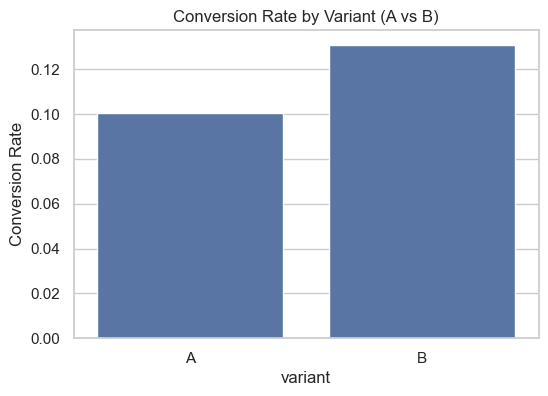

In [53]:
print("\nAverage Conversion by Variant:")
print(df.groupby('variant')['converted'].mean())

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='variant', y='converted', errorbar=None)
plt.title('Conversion Rate by Variant (A vs B)')
plt.ylabel('Conversion Rate')
plt.show()



-> Conversion by Device Type:
device
Desktop    0.115507
Mobile     0.115734
Name: converted, dtype: float64


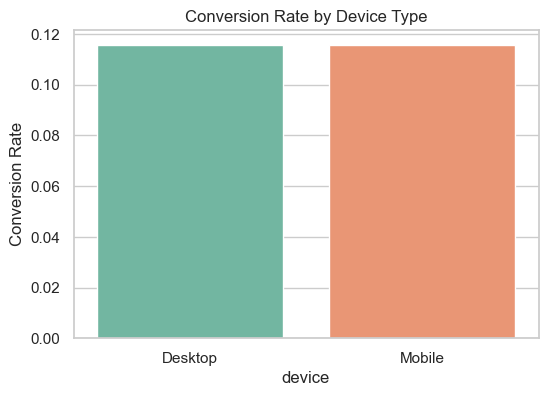

In [59]:
print("\n-> Conversion by Device Type:")
print(df.groupby('device')['converted'].mean())

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='device', y='converted', hue='device', errorbar=None, palette='Set2', legend=False)
plt.title('Conversion Rate by Device Type')
plt.ylabel('Conversion Rate')
plt.show()




-> Age Range Summary:
count    100000.000000
mean         38.497410
std          12.110869
min          18.000000
25%          28.000000
50%          38.000000
75%          49.000000
max          59.000000
Name: age, dtype: float64


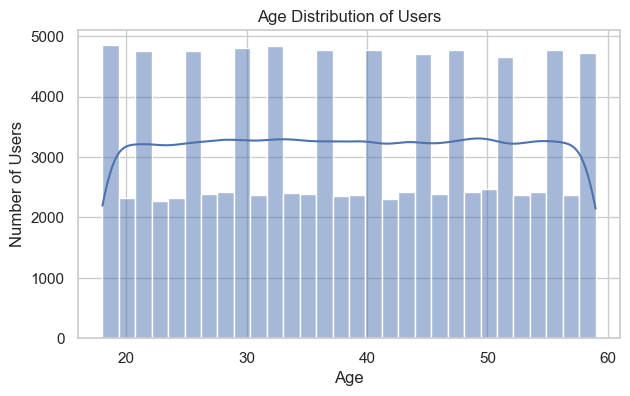

In [63]:
print("\n-> Age Range Summary:")
print(df['age'].describe())

plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()



-> Time on Site Summary:
count    100000.000000
mean        100.055407
std          20.005105
min          18.380000
25%          86.660000
50%         100.000000
75%         113.430000
max         193.890000
Name: time_on_site, dtype: float64


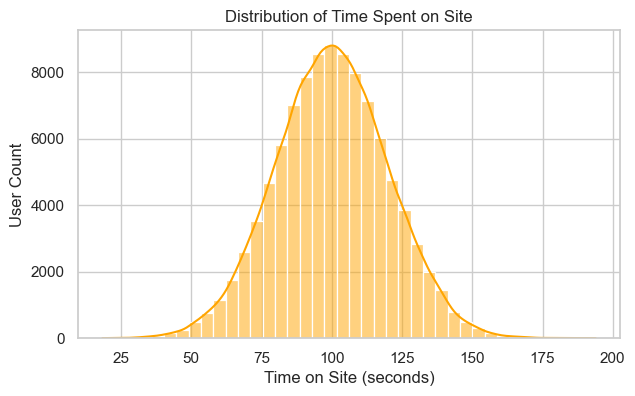

()

In [65]:
print("\n-> Time on Site Summary:")
print(df['time_on_site'].describe())

plt.figure(figsize=(7,4))
sns.histplot(df['time_on_site'], bins=40, kde=True, color='orange')
plt.title("Distribution of Time Spent on Site")
plt.xlabel("Time on Site (seconds)")
plt.ylabel("User Count")
plt.show()
()



📊 Conversion Rate by Age Group:
age_group
18-25    0.117423
26-35    0.117139
36-45    0.115187
46-60    0.113812
Name: converted, dtype: float64


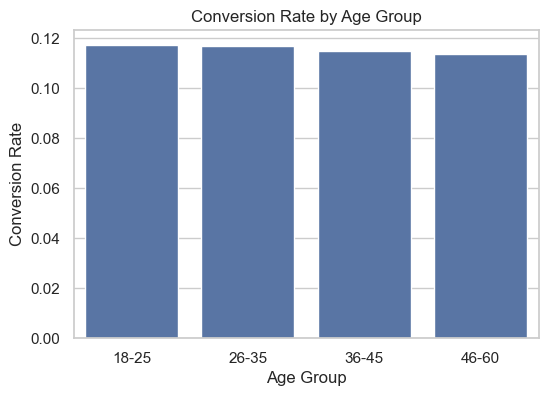

In [69]:
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 60], labels=["18-25", "26-35", "36-45", "46-60"])

print("\n📊 Conversion Rate by Age Group:")
print(df.groupby('age_group', observed=True)['converted'].mean())

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='age_group', y='converted', estimator=np.mean, errorbar=None)
plt.title('Conversion Rate by Age Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Age Group')
plt.show()



📉 Correlation Table:
               variant       age  time_on_site    device  converted
variant       1.000000 -0.002548      0.003975  0.004905   0.047329
age          -0.002548  1.000000     -0.000903  0.001676  -0.003600
time_on_site  0.003975 -0.000903      1.000000 -0.001628   0.005679
device        0.004905  0.001676     -0.001628  1.000000   0.000354
converted     0.047329 -0.003600      0.005679  0.000354   1.000000


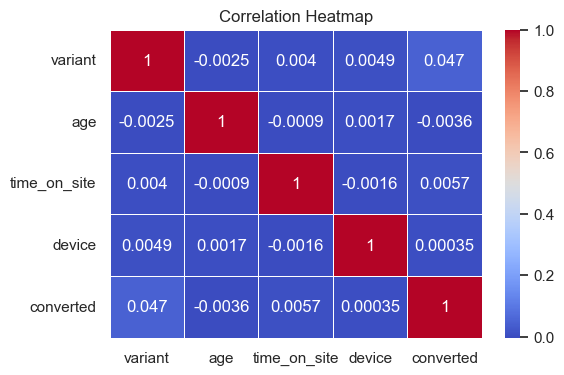

In [75]:
# Make a copy for encoding
df_encoded = df.copy()

# Encode categorical variables manually
df_encoded['variant'] = df_encoded['variant'].map({'A': 0, 'B': 1})
df_encoded['device'] = df_encoded['device'].map({'Desktop': 0, 'Mobile': 1})

# Drop non-numeric/categorical columns like 'age_group' before calculating correlation
df_encoded = df_encoded.drop(columns=['age_group'])

# Compute and display correlation table
print("\n📉 Correlation Table:")
print(df_encoded.corr())

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


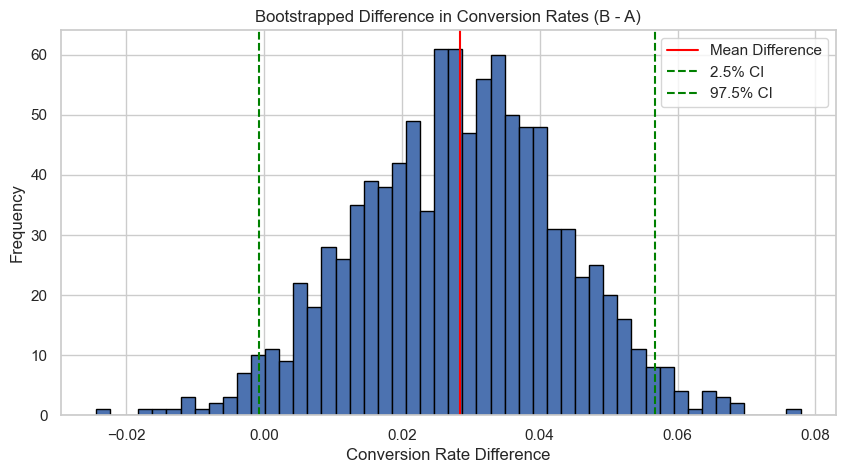

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(diffs, bins=50, edgecolor='black')
plt.axvline(np.mean(diffs), color='red', label='Mean Difference')
plt.axvline(np.percentile(diffs, 2.5), color='green', linestyle='--', label='2.5% CI')
plt.axvline(np.percentile(diffs, 97.5), color='green', linestyle='--', label='97.5% CI')
plt.title('Bootstrapped Difference in Conversion Rates (B - A)')
plt.xlabel('Conversion Rate Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [77]:
ci = np.percentile(diffs, [2.5, 97.5])
mean_diff = np.mean(diffs)

print("Mean difference (B - A):", round(mean_diff, 4))
print("95% Confidence Interval:", [round(ci[0], 4), round(ci[1], 4)])


Mean difference (B - A): 0.0284
95% Confidence Interval: [-0.0007, 0.0567]


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



df_ml = df.copy() 

#connvert categorical values into numbers
df_ml['variant'] = df_ml['variant'].map({'A': 0, 'B': 1})
df_ml['device'] = df_ml['device'].map({'Desktop': 0, 'Mobile': 1})

#Drop 'age_group' if it's still in the dataset
df_ml = df_ml.drop(columns=['age_group'])

# Define the features (input) and label (output)
X = df_ml[['variant', 'age', 'time_on_site', 'device']]  # Inputs
y = df_ml['converted']  # Output: Did the user convert (1) or not (0)

print(df_ml['converted'].value_counts(normalize=True))


converted
0    0.88438
1    0.11562
Name: proportion, dtype: float64


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [105]:
from sklearn.linear_model import LogisticRegression

# Train model with class_weight balanced to fix the class imbalance issue
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [107]:
y_pred = log_model.predict(X_test)         # Predicted class: 0 or 1
y_prob = log_model.predict_proba(X_test)[:, 1]  # Predicted probability of class 1 (converted)


In [111]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("-> Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n-> Classification Report:\n", classification_report(y_test, y_pred))
print("-> AUC-ROC Score:", roc_auc_score(y_test, y_prob))



-> Accuracy Score: 0.5098

-> Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.50      0.64     17701
           1       0.13      0.56      0.21      2299

    accuracy                           0.51     20000
   macro avg       0.51      0.53      0.43     20000
weighted avg       0.81      0.51      0.59     20000

-> AUC-ROC Score: 0.5352062444453624


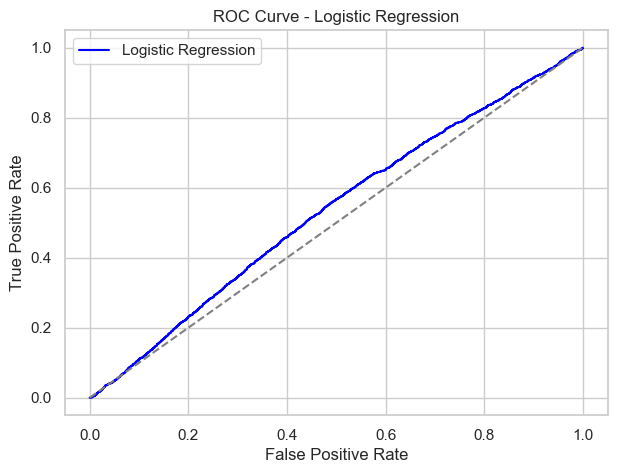

In [113]:
#printing the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


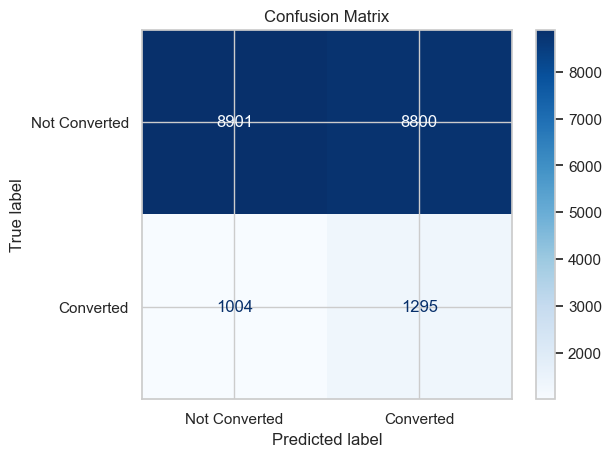

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Converted", "Converted"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


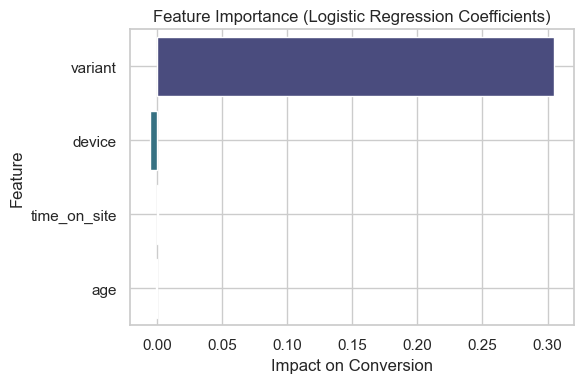

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(
    data=importance_df,
    x='Coefficient',
    y='Feature',
    hue='Feature',         # fixes the deprecation warning
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Impact on Conversion")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


In [135]:
# Pick 5 random samples from the test set
sample_inputs = X_test.sample(10, random_state=42)

# Predict probability of conversion
sample_probs = log_model.predict_proba(sample_inputs)[:, 1]

# Show sample input and predicted probability
pd.DataFrame({
    'Predicted_Prob_Convert': sample_probs
}, index=sample_inputs.index).join(sample_inputs)


,Predicted_Prob_Convert,variant,age,time_on_site,device
86525,0.530200,1,45,84.49,1
4024,0.542030,1,53,139.38,0
4731,0.460136,0,44,110.03,1
46016,0.540115,1,21,99.07,0
46674,0.530091,1,45,84.01,1
76728,0.455929,0,40,81.98,0
16434,0.531116,1,48,91.52,1
63758,0.535657,1,36,99.67,1
42976,0.461152,0,19,84.25,0
96591,0.457010,0,30,82.25,1


In [137]:
import joblib

# Save the model
joblib.dump(log_model, "logistic_model.pkl")

# Save the data used for ML
df_ml.to_csv("cleaned_ab_data_for_ml.csv", index=False)


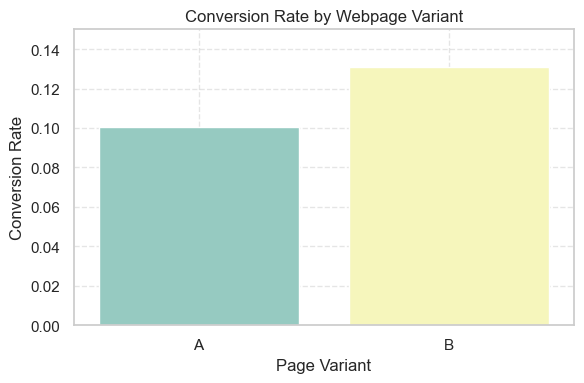

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate conversion summary
conv_summary = df.groupby('variant')['converted'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(
    data=conv_summary, 
    x='variant', 
    y='converted', 
    hue='variant',         # explicitly assign hue
    palette='Set3', 
    dodge=False, 
    legend=False
)
plt.title("Conversion Rate by Webpage Variant")
plt.ylabel("Conversion Rate")
plt.xlabel("Page Variant")
plt.ylim(0, 0.15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


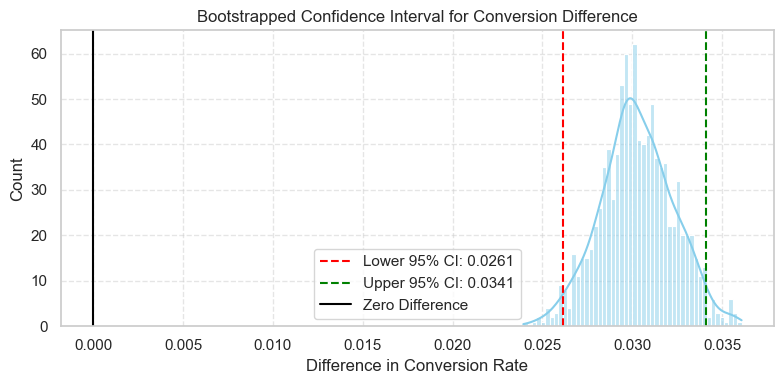

In [148]:
import numpy as np

boot_diff = []

# Run 1000 bootstrap iterations
for _ in range(1000):
    sample = df.sample(frac=1, replace=True)  # sample with replacement
    conv_A = sample[sample['variant'] == 'A']['converted'].mean()
    conv_B = sample[sample['variant'] == 'B']['converted'].mean()
    boot_diff.append(conv_B - conv_A)

# boot_diff was already calculated in Step 6
boot_diff = np.array(boot_diff)
lower, upper = np.percentile(boot_diff, [2.5, 97.5])

plt.figure(figsize=(8, 4))
sns.histplot(boot_diff, bins=50, kde=True, color='skyblue')
plt.axvline(lower, color='red', linestyle='--', label=f"Lower 95% CI: {lower:.4f}")
plt.axvline(upper, color='green', linestyle='--', label=f"Upper 95% CI: {upper:.4f}")
plt.axvline(0, color='black', linestyle='-', label="Zero Difference")
plt.title("Bootstrapped Confidence Interval for Conversion Difference")
plt.xlabel("Difference in Conversion Rate")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [156]:
print("-> FINAL REPORT\n")

print(f"Total Users Simulated: {len(df)}")
print(f"Variant A Conversion Rate: {conv_summary.loc[conv_summary['variant']=='A', 'converted'].values[0]:.4f}")
print(f"Variant B Conversion Rate: {conv_summary.loc[conv_summary['variant']=='B', 'converted'].values[0]:.4f}")
print(f"Bootstrapped 95% CI for (B - A): [{lower:.4f}, {upper:.4f}]")

print("\nLogistic Regression Model:\n")
print(f"-> Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"-> AUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")
print("\n-> Variant B improves conversion and is statistically significant.")


-> FINAL REPORT

Total Users Simulated: 100000
Variant A Conversion Rate: 0.1005
Variant B Conversion Rate: 0.1307
Bootstrapped 95% CI for (B - A): [0.0261, 0.0341]

Logistic Regression Model:

-> Accuracy: 0.5098
-> AUC-ROC Score: 0.5352

-> Variant B improves conversion and is statistically significant.
